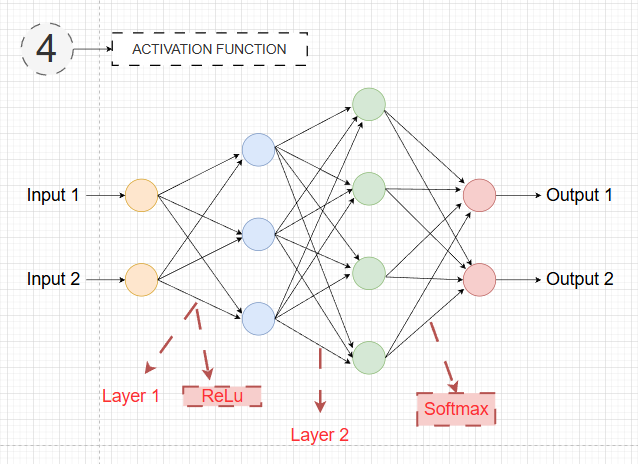

In [1]:
!pip install nnfs
!pip install matplotlib

In [2]:
import numpy as np
import nnfs
from nnfs.datasets import spiral_data
nnfs.init()

In [3]:
class Layer_Dense:
    def __init__(self, n_inputs, n_neurons):
        self.weights = 0.01 * np.random.randn(n_inputs,n_neurons)
        self.biases = np.zeros((1,n_neurons))

    def forward(self, inputs):
        self.inputs = inputs
        self.output = np.dot(inputs, self.weights) + self.biases

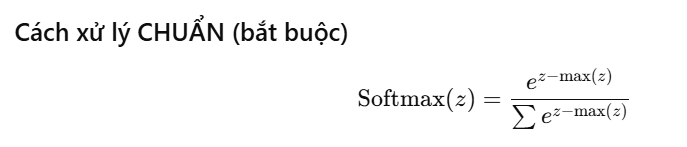

In [4]:
class Activation_Softmax:
    def forward(self, inputs):
        self.inputs = inputs

        # Subtract max for numerical stability
        exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))

        # Normalize
        probabilities = exp_values / np.sum(exp_values, axis=1, keepdims=True)

        self.output = probabilities

In [5]:
# Create data
X, y = spiral_data(samples=100, classes=3)

# Dense layer
dense1 = Layer_Dense(2, 3)

# Forward dense
dense1.forward(X)

print("Dense output:")
print(dense1.output[:5])

Dense output:
[[ 0.0000000e+00  0.0000000e+00  0.0000000e+00]
 [-1.0475188e-04  1.1395361e-04 -4.7983500e-05]
 [-2.7414842e-04  3.1729150e-04 -8.6921798e-05]
 [-4.2188365e-04  5.2666257e-04 -5.5912682e-05]
 [-5.7707680e-04  7.1401405e-04 -8.9430439e-05]]


In [6]:
# ===== Softmax experiment =====
softmax = Activation_Softmax()
softmax.forward(dense1.output)

print("\nSoftmax output:")
print(softmax.output[:5])


Softmax output:
[[0.33333334 0.33333334 0.33333334]
 [0.3333027  0.33337563 0.3333216 ]
 [0.3332468  0.33344397 0.33330923]
 [0.33318728 0.33350345 0.33330926]
 [0.33313572 0.3335661  0.3332982 ]]
